**Classification tests**

In [9]:
from imports import *
from sklearn import datasets
from classes import NeuralNetwork, GradientDescent
#from functions import mse, cross_entropy, mse_der, sigmoid, sigmoid_der, reLU, ReLU_der, identity, identity_der, accuracy, cross_entropy, polynomial_features
from functions import *
from autograd import grad
import classes
import functions
import importlib
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

importlib.reload(classes) 
importlib.reload(functions)


<module 'functions' from 'c:\\Users\\Jogga\\Documents\\H25\\FYS-STK4155\\FYS-STK4155_coursework\\Project-2\\Code\\functions.py'>

Testing the neural net for classification. Plotting accuracy as function of depth and number of nodes for multiclass. Need to tweak params to get the best accuracies. I believe the NN is very prone to changes in performance best on these...

Accuracy for 0 layers and 0 nodes: 0.8865714285714286
Accuracy for 0 layers and 1 nodes: 0.8825
Accuracy for 0 layers and 2 nodes: 0.8842857142857142
Accuracy for 0 layers and 3 nodes: 0.8849285714285714
Accuracy for 1 layers and 0 nodes: 0.7830714285714285
Accuracy for 1 layers and 1 nodes: 0.8548571428571429
Accuracy for 1 layers and 2 nodes: 0.8813571428571428
Accuracy for 1 layers and 3 nodes: 0.8932857142857142
Accuracy for 2 layers and 0 nodes: 0.7719285714285714
Accuracy for 2 layers and 1 nodes: 0.8407142857142857
Accuracy for 2 layers and 2 nodes: 0.8759285714285714
Accuracy for 2 layers and 3 nodes: 0.8917142857142857
Accuracy for 3 layers and 0 nodes: 0.7722142857142857
Accuracy for 3 layers and 1 nodes: 0.8200714285714286
Accuracy for 3 layers and 2 nodes: 0.8713571428571428
Accuracy for 3 layers and 3 nodes: 0.8965714285714286


NameError: name 'nodes' is not defined

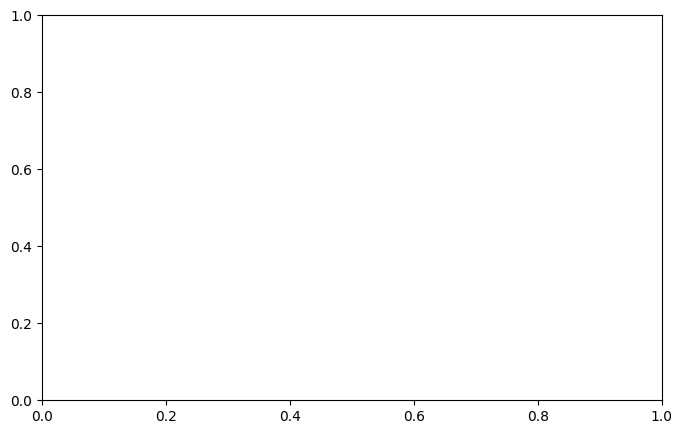

In [ ]:

import seaborn as sns


def onehot(y, n=None):
    y = np.asarray(y, dtype=int).ravel()
    n = np.max(y) + 1 if n is None else n
    m = np.zeros((y.size, n))
    m[np.arange(y.size), y] = 1
    return m


mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype(np.float32) / 255.0
y = mnist.target.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
Y_train, Y_test = onehot(y_train), onehot(y_test)

layers_list = [0, 1, 2, 3]
nodes_list = [5, 10, 25, 50]
acc = np.zeros((len(layers_list), len(nodes_list)))

for i, L in enumerate(layers_list):
    for j, N in enumerate(nodes_list):
        if L == 0:
            layers, acts, ders = [10], [softmax], [softmax_der]
        else:
            layers = [N]*L + [10]
            acts = [sigmoid]*L + [softmax]
            ders = [sigmoid_der]*L + [softmax_der]
        Classifier = NeuralNetwork(X_train.shape[1], layers, acts, ders, cross_entropy, cross_entropy_der)
        Classifier.train_SGD(X_train, Y_train, n_epochs=10, eta=0.2, minibatch_size=100)
        predictions = Classifier.feed_forward(X_test)
        y_pred_label = np.argmax(predictions, axis=1)
        accuracy = np.mean(y_test == y_pred_label)
        acc[i,j] = accuracy
        print(f"Accuracy for {i} layers and {j} nodes: {accuracy}")

import os

save_dir = os.path.join(os.path.dirname(os.getcwd()), "Figures")

os.makedirs(save_dir, exist_ok=True)

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(acc, annot=True, fmt=".2f", cmap="viridis", ax=ax)
ax.set_xlabel("Nodes per Hidden Layer", fontsize=15)
ax.set_ylabel("Number of Hidden Layers", fontsize=15)
ax.set_title("Test Accuracy Heatmap", fontsize=17)
ax.legend()


save_path = os.path.join(save_dir, "HM_classification.png")
fig.savefig(save_path, dpi=300, bbox_inches='tight')
